In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
from astropy.io import fits
from astropy.table import Table
from mongoengine import connect
from itertools import cycle
from pybirales.repository.models import SpaceDebrisTrack
import os

In [20]:
OUT_DIR = "/home/denis/.birales/visualisation/analysis"

In [21]:
SAVE_FIGURES = False
UNI_RED = '#BA0C2F'
CMAP = sns.dark_palette('#BA0C2F', as_cmap=True)
db_connection = connect(
    db='birales',
    username='birales_rw',
    password='arcadia10',
    port=27017,
    host='localhost')

In [22]:
# Seaborn settings
# This sets reasonable defaults for font size for
# a figure that will go in a paper
sns.set_context("poster")

# Set the font to be serif, rather than sans
sns.set(font='serif')

# Make the background white, and specify the
# specific font family
sns.set_style("ticks",
              {'axes.axisbelow': True,
                 'axes.edgecolor': '#666666',
                 'axes.facecolor': 'white',
                 'axes.grid': True,
                 'axes.labelcolor': '.15',
                 'axes.spines.bottom': True,
                 'axes.spines.left': True,
                 'axes.spines.right': True,
                 'axes.spines.top': True,
                 'figure.facecolor': 'white',
                 'font.family': ['serif'],
                 'font.sans-serif': ['Arial',
                 'DejaVu Sans',
                 'Liberation Sans',
                 'Bitstream Vera Sans',
                 'sans-serif'],
                 'grid.color': '#e0e0e0',
                 'grid.linestyle': '-',
                 'image.cmap': 'rocket',
                 'lines.solid_capstyle': 'round',
                 'lines.linewidth': 5,
                 'patch.edgecolor': 'w',
                 'patch.force_edgecolor': True,
                 'text.color': '.15',
                 'xtick.bottom': True,
                 'xtick.color':  '#666666',
                 'xtick.direction': 'out',
                 'xtick.top': False,
                 'ytick.color': '#666666',
                 'ytick.direction': 'out',
                 'ytick.left': True,
                 'ytick.right': False}
)

COLORS = np.array([
['#ba0c3f', 'um_red'],    
['#27251f', 'um_black'],
['#d6a090', 'pinkish tan'],
['#fe3b1e', 'orangey red'],
['#a12c32', 'rouge'],
['#fa2f7a', 'strong pink'],
['#fb9fda', 'bubblegum pink'],
['#e61cf7', 'pink/purple'],
['#992f7c', 'warm purple'],
['#47011f', 'burgundy'],
['#051155', 'navy blue'],
['#4f02ec', 'blue/purple'],
['#2d69cb', 'medium blue'],
['#00a6ee', 'azure'],
['#6febff', 'robin’s egg'],
['#08a29a', 'blue/green'],
['#2a666a', 'dark aqua'],
['#063619', 'dark forest green'],
['#4a4957', 'charcoal grey'],
['#8e7ba4', 'greyish purple'],
['#b7c0ff', 'light periwinkle'],
['#acbe9c', 'greenish grey'],
['#827c70', 'medium grey'],
['#5a3b1c', 'brown'],
['#ae6507', 'umber'],
['#f7aa30', 'yellowish orange'],
['#f4ea5c', 'yellowish'],
['#9b9500', 'pea soup'],
['#566204', 'mud green'],
['#11963b', 'kelley green'],
['#51e113', 'toxic green'],
['#08fdcc', 'bright teal']])

BEAM_COLORS = {}

for i, color in enumerate(COLORS):
    BEAM_COLORS[i] = color[0]

# COLORS = ['#5E35B1', UNI_RED, '#3949AB','#00897B', '#FFB300', '#6D4C41', '#546E7A', '#F4511E']
COLORS_C = cycle(COLORS[:, 0])

In [23]:
ROOT = "/home/denis/.birales/visualisation/fits/30774"
OBSERVATION_ID = "5b77f8a0be045a6eb32256c3" # NORAD_4071 (id = 4)
# OBSERVATION_ID = "5b784f1fbe045a2044a9de63" # NORAD_37820 (Tiangong1) (id = 0)
# OBSERVATION_ID = "5b78532bbe045a22abe3596f" # NORAD_20439 (id = 1)
detected_candidates = SpaceDebrisTrack.get(observation_id=OBSERVATION_ID)


for c in detected_candidates:
    print len(c.data['snr'])
    
TRACK_ID = 4
TRACK_NAME = 'NORAD_4071'

13
9
7
92
9333
11


In [24]:
if not detected_candidates:
    print('No detection tracks in observation', observation_id)

# Get the track in the observation by TRACK_ID
track = detected_candidates[TRACK_ID]
TX = track.tx
df = pd.DataFrame(track.data)
# Calculate doppler shift
df['doppler'] = (df['channel'] - TX) * 1e6
df['color'] =  df['beam_id']
df['beam_id'] = df['beam_id'].astype(int)
df=df.sort_values(by=['time_sample'])

print('Track size: {}'.format(df.shape))

def out_file(filename):
    return os.path.join(OUT_DIR,'{}_{}.pdf'.format(TRACK_NAME, filename))

Track size: (9333, 8)


In [25]:
# Preview the data
df.head()

,beam_id,channel,channel_sample,snr,time,time_sample,doppler,color
0,23,410.083445,1110,5.512046,2018-03-29 07:28:43.567,890,-1555.404663,23
1,11,410.083445,1110,4.921314,2018-03-29 07:28:43.567,890,-1555.404663,11
2,0,410.083445,1110,6.031139,2018-03-29 07:28:43.567,890,-1555.404663,0
17,23,410.083416,1107,16.371021,2018-03-29 07:28:43.672,891,-1584.014893,23
16,15,410.083426,1108,7.604159,2018-03-29 07:28:43.672,891,-1574.478149,15


In [26]:
df.describe()

,beam_id,channel,channel_sample,snr,time_sample,doppler,color
count,9333.000000,9333.000000,9333.000000,9333.000000,9333.000000,9333.000000,9333.000000
mean,15.191793,410.082152,974.424944,10.394665,973.583307,-2848.349154,15.191793
std,8.941089,0.000590,61.902746,4.569058,38.649904,590.350587,8.941089
min,0.000000,410.080603,812.000000,4.459759,890.000000,-4397.354126,0.000000
25%,7.000000,410.081690,926.000000,6.655733,944.000000,-3310.165405,7.000000
50%,15.000000,410.082157,975.000000,9.531320,973.000000,-2842.864990,15.000000
75%,23.000000,410.082605,1022.000000,13.165016,1004.000000,-2394.638062,23.000000
max,31.000000,410.083445,1110.000000,28.745370,1076.000000,-1555.404663,31.000000


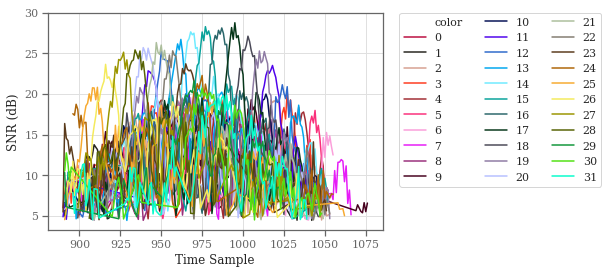

In [27]:
# Figure 1. Power against time for each beam

# Process the data. Select highest SNR in time, and channel (within the beam)
df = df.sort_values('snr', ascending=False).drop_duplicates(subset=['time_sample', 'beam_id']).sort_values(by=['beam_id'])
df = df.sort_values('snr', ascending=False).drop_duplicates(subset=['channel_sample', 'beam_id']).sort_values(by=['beam_id'])


ax1 = sns.lineplot(y="snr", x="time_sample", data=df,estimator=None, ci=None, hue=df['color']
                   , sort=True, palette=BEAM_COLORS)
ax1.set(xlabel='Time Sample', ylabel='SNR (dB)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=3)

if SAVE_FIGURES:
    plt.savefig(out_file('power_time'))

In [28]:
df1 = df.copy()

print ('Track was detected across the following beams: {}'.format(df['beam_id'].unique()))

# Process the data. Select highest SNR in time (within the beam)
df1 = df1.sort_values('snr', ascending=False).drop_duplicates(subset=['time_sample']).sort_values(by=['time_sample'])

print ('Track reduced to {} from {} pixels after SNR/Time duplicate filter'.format(len(df1), len(df)))

# Process the data. Select highest SNR in channel (within the beam)
df1 = df1.sort_values('snr', ascending=False).drop_duplicates(subset=['channel_sample']).sort_values(by=['time_sample'])

print ('Track reduced to {} from {} pixels after SNR/Channel duplicate filter'.format(len(df1), len(df)))

Track was detected across the following beams: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
Track reduced to 184 from 3732 pixels after SNR/Time duplicate filter
Track reduced to 184 from 3732 pixels after SNR/Channel duplicate filter


[ 0 23 24 25 26 27 28 20 21 12 22 13 14 15 16 17 18 19 11  3  4  5  6  7
  9]


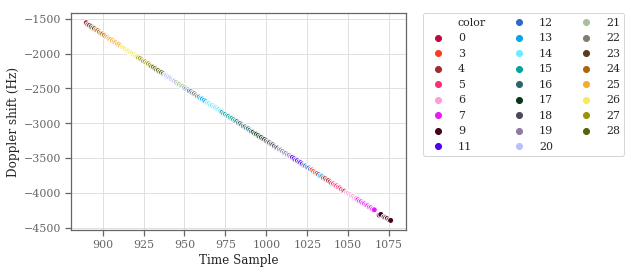

In [29]:
# Figure 2. Doppler shift against time for each beam

ax2 = sns.scatterplot(y="doppler", x="time_sample", data=df1, hue='color', estimator=None, linewidth=1, palette=BEAM_COLORS);
ax2.set(xlabel='Time Sample', ylabel='Doppler shift (Hz)')
print(df1['beam_id'].unique())
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, ncol=3)

if SAVE_FIGURES:
    plt.savefig(out_file('doppler_time_all_beams'))    

[ 0 23 24 25 26 27 28 20 21 12 22 13 14 15 16 17 18 19 11  3  4  5  6  7
  9]


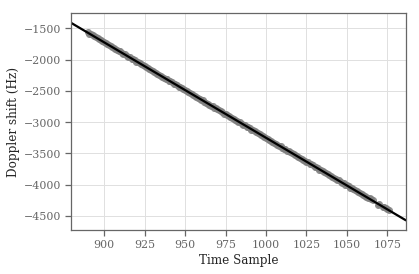

In [30]:
# Figure 3. Doppler shift against time without coloring beams

ax2 = sns.regplot(y="doppler", x="time_sample", data=df1, 
                 fit_reg=True,
                 line_kws={'color': 'black'}, scatter_kws={'color': 'gray'});
ax2.set(xlabel='Time Sample', ylabel='Doppler shift (Hz)')
plt.rcParams["axes.edgecolor"] = "#666666"
print(df1['beam_id'].unique())

if SAVE_FIGURES:
    plt.savefig(out_file('doppler_time'))    

Track reduced to 25 from pixels after SNR/beam duplicate filter
Beam illumination sequence is: [ 0 23 24 25 26 27 28 20 21 12 22 13 14 15 16 17 18 19 11  3  4  5  6  7
  9]


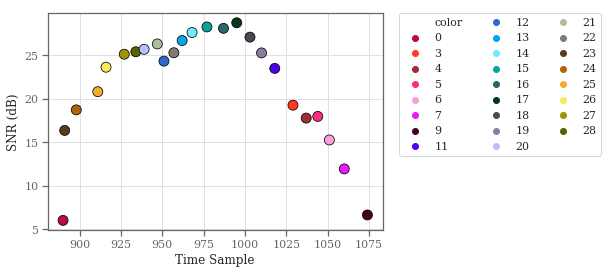

In [31]:
# Figure 4. Beam illumination sequence. 
# Process the data. Select highest SNR in time (within the beam)
df2 = df1.copy()

# Process the data. Select highest SNR in time (within the beam)
df2 = df2.sort_values('snr', ascending=False).drop_duplicates(subset=['beam_id']).sort_values(by=['time_sample'])
print ('Track reduced to {} from pixels after SNR/beam duplicate filter'.format(len(df2), len(df1)))
print ('Beam illumination sequence is: {}'.format(df2['beam_id'].unique()))

# Plot
ax3 = sns.scatterplot(y="snr", x="time_sample", hue='color', data=df2, palette=BEAM_COLORS, s=100, edgecolor='black')
ax3.set(xlabel='Time Sample', ylabel='SNR (dB)')
plt.rcParams["axes.edgecolor"] = "#666666"
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, ncol=3)

if SAVE_FIGURES:
    plt.savefig(out_file('power_time_beam_order'))   

In [32]:
# Adding pointing information to the beams
pointings = np.array(track.pointings['ra_dec'])
ra_poinings = pointings[:, 0]
dec_poinings = pointings[:, 1]

df2['dec'] = dec_poinings[df2['beam_id']]
df2['ra'] = ra_poinings[df2['beam_id']]

df3 = df2.copy()



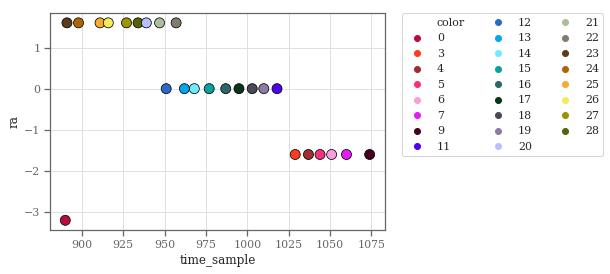

In [33]:
# Figure 5: Trajectory RA v. time
ax4 = sns.scatterplot(y="ra", x="time_sample", hue='color', data=df3, palette=BEAM_COLORS, s=100, edgecolor='black')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, ncol=3)

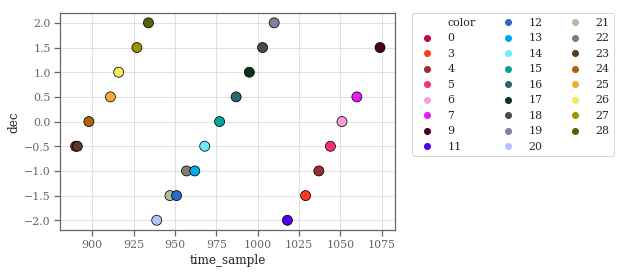

In [34]:
# Figure 6: Trajectory DEC v. time
ax5 = sns.scatterplot(y="dec", x="time_sample", hue='color', data=df3, palette=BEAM_COLORS, s=100, edgecolor='black')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, ncol=3)


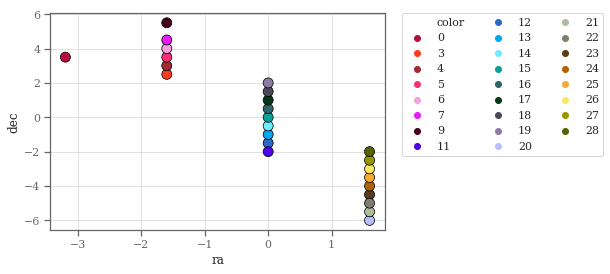

In [35]:
# Figure 7: Trajectory RA/DEC
# To be compared with real trajectory of the space debris
df4 = df3.copy()

df4.loc[df4['ra'] < 0, 'dec'] += 4
df4.loc[df4['ra'] > 0, 'dec'] -= 4

ax6 = sns.scatterplot(y="dec", x="ra", hue='color', data=df4, palette=BEAM_COLORS, s=100, edgecolor='black')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, ncol=3)

In [36]:
d_dec = df4['dec'].max() - 

SyntaxError: invalid syntax (<ipython-input-36-564733ca4e83>, line 1)